<a href="https://colab.research.google.com/github/shahabday/DSR-practical-computer-vision/blob/main/scratchpad_pet_classification_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai


In [ ]:
from fastai.vision.all import *

dir(URLs)

['ADULT_SAMPLE',
 'AG_NEWS',
 'AMAZON_REVIEWS',
 'AMAZON_REVIEWS_POLARITY',
 'BIWI_HEAD_POSE',
 'BIWI_SAMPLE',
 'CALTECH_101',
 'CAMVID',
 'CAMVID_TINY',
 'CARS',
 'CIFAR',
 'CIFAR_100',
 'COCO_SAMPLE',
 'COCO_TINY',
 'CUB_200_2011',
 'DBPEDIA',
 'DOGS',
 'FLOWERS',
 'FOOD',
 'GOOGLE',
 'HUMAN_NUMBERS',
 'IMAGENETTE',
 'IMAGENETTE_160',
 'IMAGENETTE_320',
 'IMAGEWANG',
 'IMAGEWANG_160',
 'IMAGEWANG_320',
 'IMAGEWOOF',
 'IMAGEWOOF_160',
 'IMAGEWOOF_320',
 'IMDB',
 'IMDB_SAMPLE',
 'LOCAL_PATH',
 'LSUN_BEDROOMS',
 'MACAQUES',
 'MDL',
 'ML_100k',
 'ML_SAMPLE',
 'MNIST',
 'MNIST_SAMPLE',
 'MNIST_TINY',
 'MNIST_VAR_SIZE_TINY',
 'MT_ENG_FRA',
 'OPENAI_TRANSFORMER',
 'PASCAL_2007',
 'PASCAL_2012',
 'PETS',
 'PLANET_SAMPLE',
 'PLANET_TINY',
 'S3',
 'S3_AUDI',
 'S3_COCO',
 'S3_IMAGE',
 'S3_IMAGELOC',
 'S3_MODEL',
 'S3_NLP',
 'SIIM_SMALL',
 'SOGOU_NEWS',
 'TCGA_SMALL',
 'URL',
 'WIKITEXT',
 'WIKITEXT_TINY',
 'WT103_BWD',
 'WT103_FWD',
 'YAHOO_ANSWERS',
 'YELP_REVIEWS',
 'YELP_REVIEWS_POLARITY',
 

In [ ]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
from pathlib import Path
import os
save_path = Path('/gdrive/MyDrive/oxford-pets')
os.makedirs(save_path, exist_ok=True)


In [ ]:
# This downloads the images from the AWS url in URLs.PETS

path = untar_data(URLs.PETS, data=save_path )
path

Path('/gdrive/MyDrive/oxford-pets/oxford-iiit-pet')

In [ ]:
path

Path('/gdrive/MyDrive/oxford-pets/oxford-iiit-pet')

In [ ]:
# Check how many images we have on the decompressed folder
len(os.listdir(path / 'images'))

4770

In [ ]:
import re # this is the regex library of Python
from pathlib import Path

def get_labels(path):
  """Applies the regular expression to extract labels from filenames.

  Args:
    path: The path to the directory containing the images.

  Returns:
    A list of labels extracted from the filenames.
  """
  image_files = get_image_files(path / "images")
  labels = []
  for file_path in image_files:
    filename = file_path.name
    match = re.search(r'(.+)_\d+.jpg$', filename)
    if match:
      label = match.group(1)
      labels.append(label)
  return labels

# Get the labels
labels = get_labels(path)

# Print the labels
print(labels)


['Russian_Blue', 'staffordshire_bull_terrier', 'leonberger', 'Persian', 'japanese_chin', 'yorkshire_terrier', 'Bengal', 'keeshond', 'great_pyrenees', 'Birman', 'saint_bernard', 'pug', 'pug', 'japanese_chin', 'Egyptian_Mau', 'Ragdoll', 'British_Shorthair', 'american_pit_bull_terrier', 'staffordshire_bull_terrier', 'great_pyrenees', 'great_pyrenees', 'american_bulldog', 'yorkshire_terrier', 'Bombay', 'chihuahua', 'german_shorthaired', 'staffordshire_bull_terrier', 'english_setter', 'wheaten_terrier', 'german_shorthaired', 'leonberger', 'Egyptian_Mau', 'basset_hound', 'wheaten_terrier', 'yorkshire_terrier', 'japanese_chin', 'english_setter', 'samoyed', 'pug', 'american_pit_bull_terrier', 'Persian', 'great_pyrenees', 'Siamese', 'pug', 'Abyssinian', 'saint_bernard', 'beagle', 'english_cocker_spaniel', 'pug', 'german_shorthaired', 'wheaten_terrier', 'Sphynx', 'Bengal', 'yorkshire_terrier', 'american_bulldog', 'miniature_pinscher', 'miniature_pinscher', 'german_shorthaired', 'keeshond', 'beag

## Get labels from images

In [ ]:
path

Path('/gdrive/MyDrive/oxford-pets/oxford-iiit-pet')

In [ ]:
# This is the most difficult part of fastai
# figuring out how to configure the DataBlock
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 #
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
pets

In [ ]:
dls = pets.dataloaders(path/"images")
list(dls)

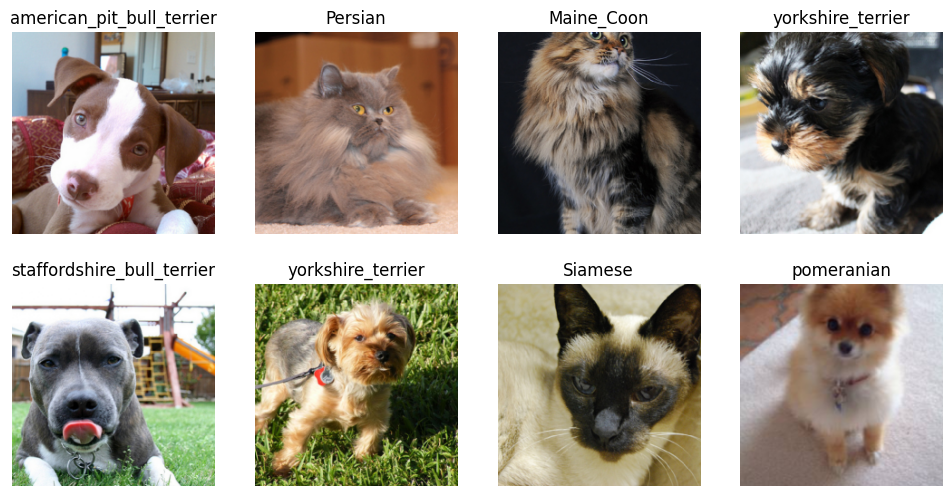

In [ ]:
dls.valid.show_batch(nrows=2, ncols=4)

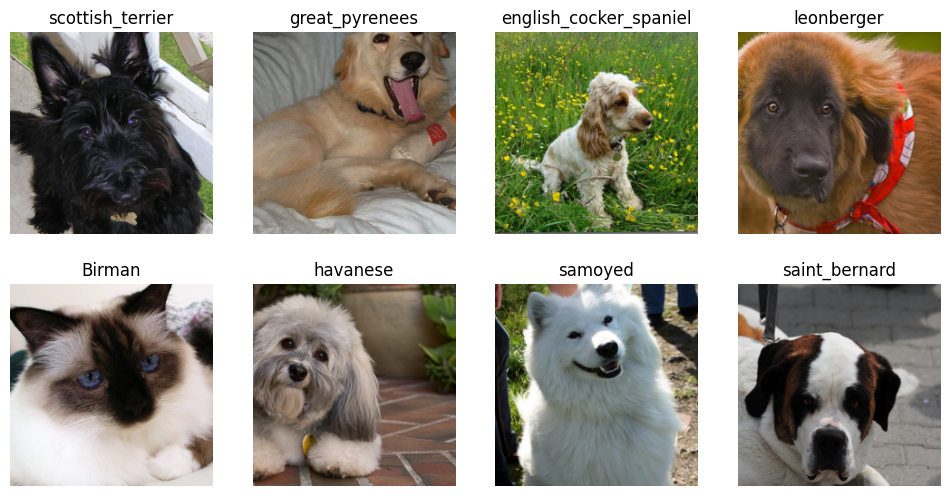

In [ ]:
dls.train.show_batch(nrows=2, ncols=4)

In [ ]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 4768 items
2 datasets of sizes 3815,953
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /gdrive/MyDrive/oxford-pets/oxford-iiit-pet/images/english_cocker_spaniel_67.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=375x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /gdrive/MyDrive/oxford-pets/oxford-iiit-pet/images/english_cocker_spaniel_67.jpg
    applying partial gives
      english_cocker_spaniel
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(18)

Final sample: (PILImage mode=RGB size=375x500, TensorCategory(18))


Found 4768 items
2 datasets of sizes 3815,953
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 

In [ ]:
# error_rate = 1 - accuracy
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [ ]:
## The model used in fastai can be changed to any other PyTorch architecture
#learn.model = resnet18
#learn.model

In [ ]:
#from torchvision.models import resnet18
#resnet18 = resnet18()
#resnet18

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
??learn.fine_tune

In [ ]:
#learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.161701,0.413295,0.131165,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.626014,0.319120,0.111228,00:20
1,0.499628,0.285548,0.089192,00:20
2,0.339797,0.255174,0.087093,00:20


In [ ]:
??learn.fine_tune

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

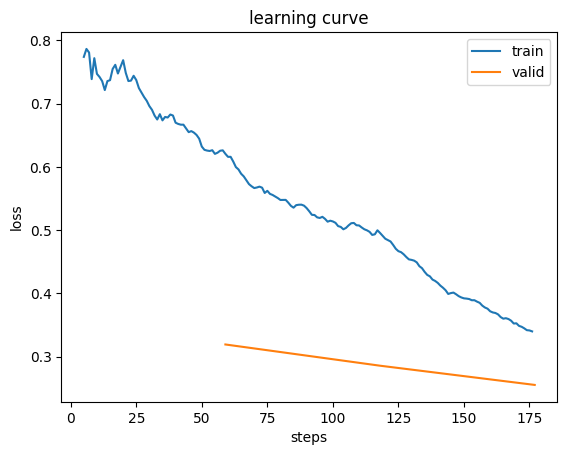

In [ ]:
learn.recorder.plot_loss()

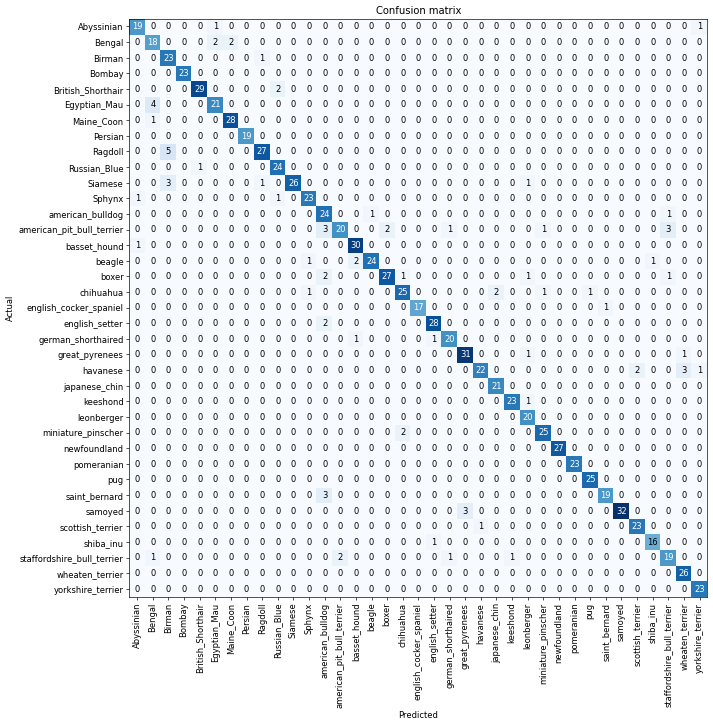

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [ ]:
learn.fine_tune(3, freeze_epochs=2)

epoch,train_loss,valid_loss,error_rate,time
0,0.249333,0.253011,0.091291,00:18
1,0.274910,0.317610,0.103882,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.236575,0.310901,0.096537,00:20
1,0.238934,0.284512,0.096537,00:20
2,0.182654,0.268439,0.080797,00:20


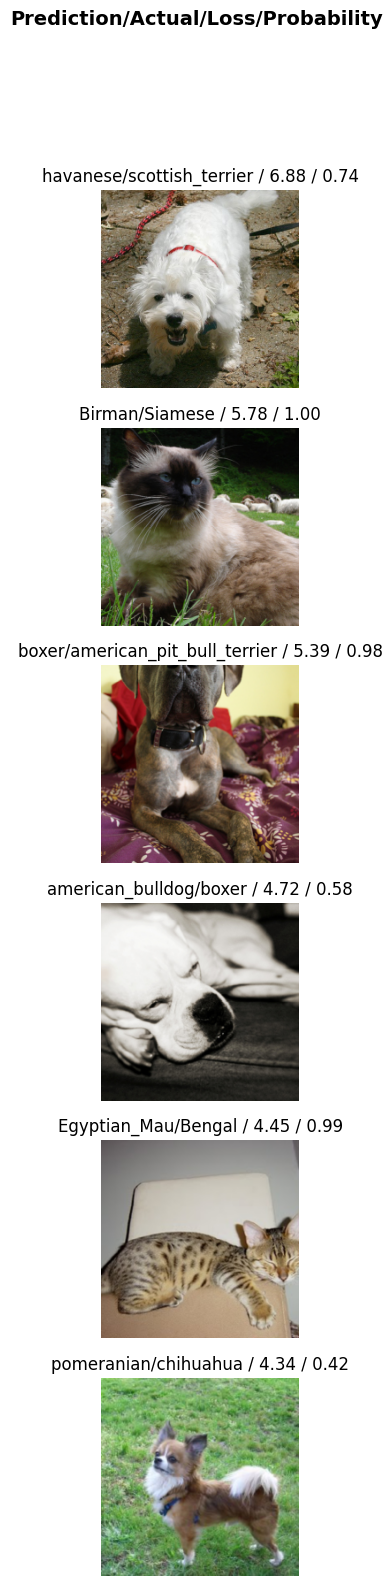

In [ ]:
interp.plot_top_losses(9, nrows=6, ncols=1)

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

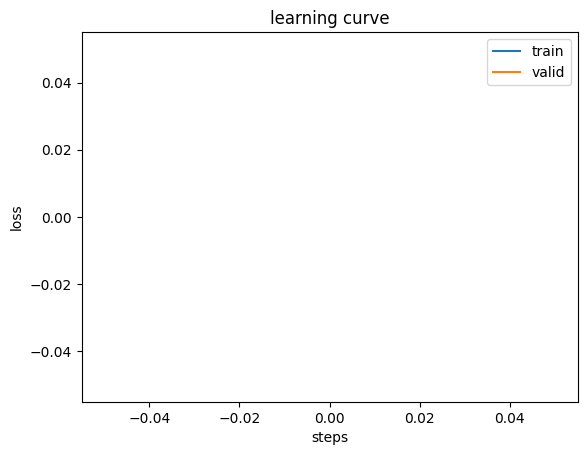

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.fine_tune(3, freeze_epochs=0)

epoch,train_loss,valid_loss,error_rate,time
0,0.157764,0.333074,0.105981,00:20
1,0.155918,0.320167,0.100735,00:20
2,0.127460,0.315129,0.088143,00:20


In [ ]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 9),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Siamese', 'Birman', 3),
 ('beagle', 'basset_hound', 3),
 ('havanese', 'wheaten_terrier', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'pomeranian', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('saint_bernard', 'american_bulldog', 2)]

## Using the `base_lr` finder

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

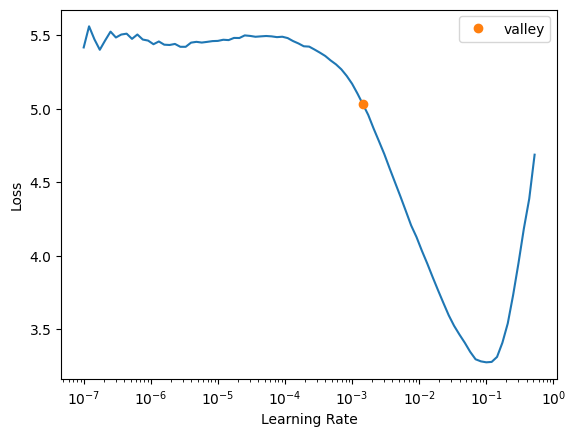

In [ ]:
# this creates a new resnet18 model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.path = Path('/gdrive/MyDrive/oxford-pets/models')
valley = learn.lr_find()

In [ ]:
valley

SuggestedLRs(valley=0.0014454397605732083)

## Checkpointing the model with best performance

In [ ]:
# SaveModelCallback(): savs the model with best performance in the validation set (so far)
learn.fine_tune(3, freeze_epochs=1,
                base_lr=valley.valley,
                # with_opt=True saves the state of the optimizer, including the learning rate
                # In our case the valley that we found with lr_finder
                cbs=SaveModelCallback(with_opt=True,))

epoch,train_loss,valid_loss,error_rate,time
0,2.527795,0.499240,0.168940,00:17


Better model found at epoch 0 with valid_loss value: 0.4992403984069824.


epoch,train_loss,valid_loss,error_rate,time
0,0.733806,0.344329,0.110178,00:20
1,0.532173,0.302168,0.101784,00:20
2,0.395225,0.282112,0.084995,00:20


Better model found at epoch 0 with valid_loss value: 0.34432923793792725.
Better model found at epoch 1 with valid_loss value: 0.30216848850250244.
Better model found at epoch 2 with valid_loss value: 0.28211236000061035.


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

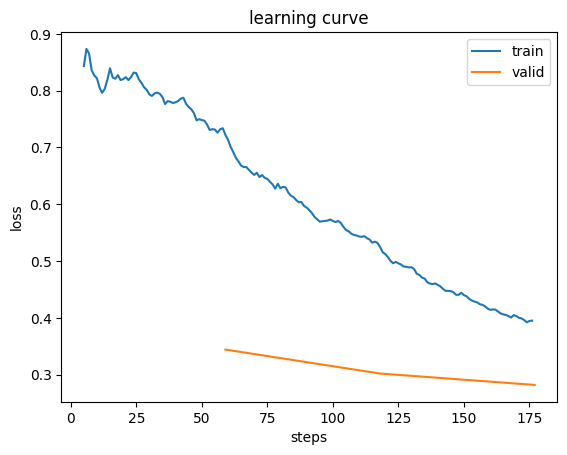

In [ ]:
learn.recorder.plot_loss()

## Reloads the model on its best configuration (so far)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate, path='/gdrive/MyDrive/oxford-pets/models') # Note: I hardcoded the path based on your previous cells
learn.load('model') # Loads the model named 'model' in the specified path